# Практическая работа №6
### Выполнила студентка группы БВТ2101 Пьянова Анна Олеговна
Необходимо построить сверточную нейронную сеть, которая будет классифицировать черно-белые изображения с простыми геометрическими фигурами на них.

Вариант 3: Классификация изображений с горизонтальной или вертикальной линией

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from var3 import gen_data

Генерация и загрузка данных

In [44]:
data, label = gen_data(size=500, img_size=28)

Предобработка данных

In [45]:
data = data.reshape(-1, 28, 28, 1)

label_num = np.where(label == 'Horizontal', 0, 1)
label_num = to_categorical(label_num, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(data, label_num, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

Определение модели

In [46]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

Компиляция и обучение модели

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7863 - loss: 0.6081 - val_accuracy: 0.9600 - val_loss: 0.2563
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9388 - loss: 0.2028 - val_accuracy: 0.9600 - val_loss: 0.0366
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9698 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 0.0322
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9662 - loss: 0.0555 - val_accuracy: 1.0000 - val_loss: 0.0209
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9555 - loss: 0.0473 - val_accuracy: 1.0000 - val_loss: 0.0257
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9621 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9608 - loss: 0.0541 - val_accuracy: 0.9600 - val_loss: 0.0281
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.0445 - val_accuracy: 0.9600 - val_lo

Построение графиков зависимости точности/потерь от эпох

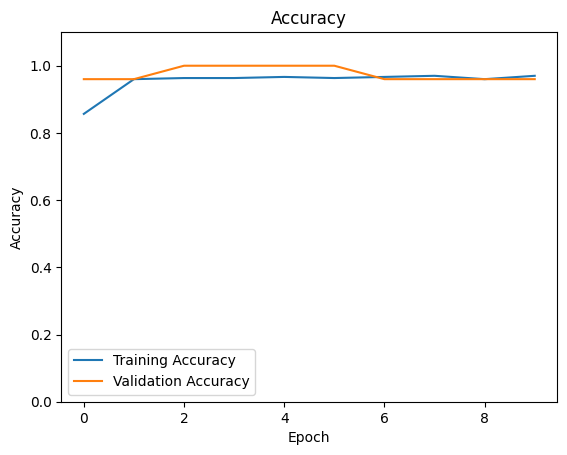

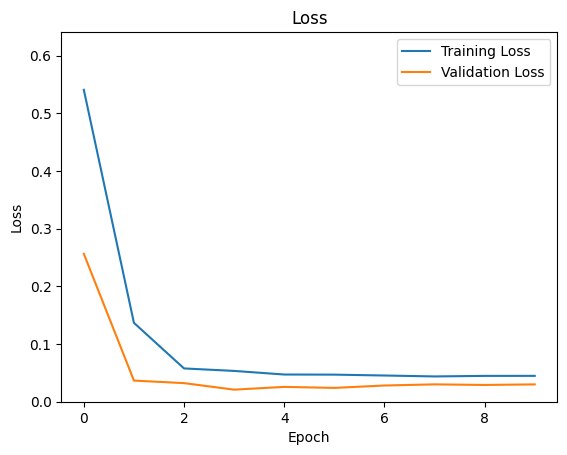

In [49]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1) 
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(history.history['loss']) + 0.1) 
plt.legend()
plt.show()